# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [2]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [66]:
# scrape the names of the items on the webpage above
import bs4 as bs
import urllib.request
from lxml import html
import pandas as pd


source = urllib.request.urlopen('https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat').read()
soup = bs.BeautifulSoup(source,'lxml')

product_names = []
for i in soup.find_all('div', class_='product-name'):
    product_names.append(list(i.next.next.contents))
product_names[0:10]

prod_names_cleaned = []
for name in product_names:
    if len(name) > 1:
        name = (name[0] + name[2])
        prod_names_cleaned.append(str(name))
    prod_names_cleaned.append(str(name).strip('[').strip(']').strip("'"))


In [69]:
# load the data into a dataframe file
prod_names_df = pd.DataFrame(prod_names_cleaned)

In [68]:
# save the data as a csv file
prod_names_df.to_csv('Product_Names.csv')

In [138]:
# display df.head()
prod_names_df.head(10)

,0
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Greenies Petite Dental Dog Treats
4,Authority Dental & DHA Stick Puppy Treats Pars...
5,Authority Dental & DHA Stick Puppy Treats Pars...
6,"WHIMZEES Brushzees Dental Dog Treat - Natural,..."
7,Pedigree Dentastix Triple Action Dental Dog Tr...
8,Pedigree Dentastix Large Dog Treats
9,Pedigree Dentastix Large Dog Sticks


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [93]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
df = pd.read_csv('part2.csv') # i moved into the main folder because for some reason it wasn't finding it in the other folder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salaries      5000 non-null   float64
 1   NPS Score     5000 non-null   float64
 2   eventOutcome  5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [89]:
def zscores(arr):
    mean = arr.mean()
    std = arr.std()
    zscores = [(x - mean) / std for x in arr]
    return zscores
    """
    write a function that calculates 
    the zscores of a numpy arr, arr.
    """

In [95]:
# calculate the zscore for each column and store them as a new column with the names used 
df['salaries_zscores'] = zscores(df['salaries'])
df['NPS Score_zscores'] = zscores(df['NPS Score'])
df['eventOutcome_zscores'] = zscores(df['eventOutcome'])

df.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

Text(0.5, 1.0, 'NPS Score')

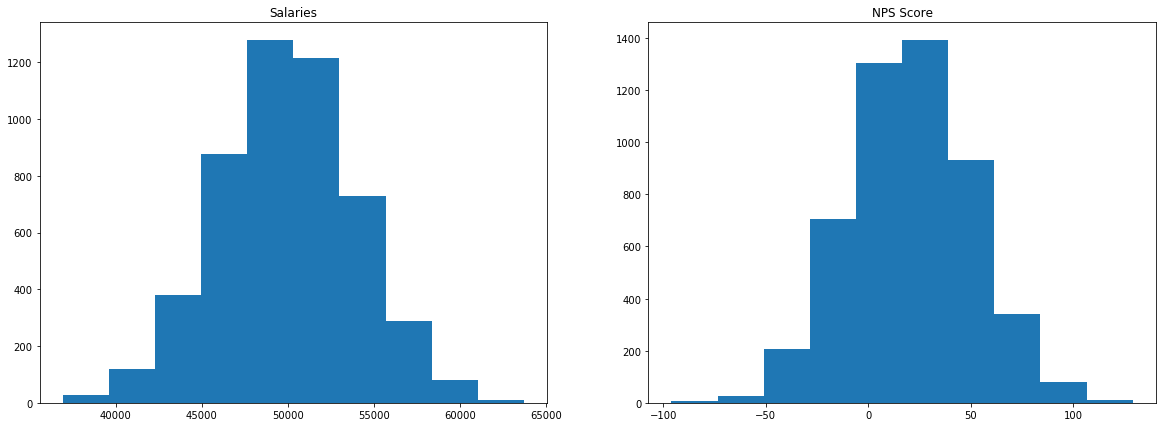

In [106]:
# plot for raw salaries and NPS Score data goes here
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df['salaries'])
ax2.hist(df['NPS Score'])
ax1.set_title('Salaries')
ax2.set_title('NPS Score')

Text(0.5, 1.0, 'NPS Score z-scores')

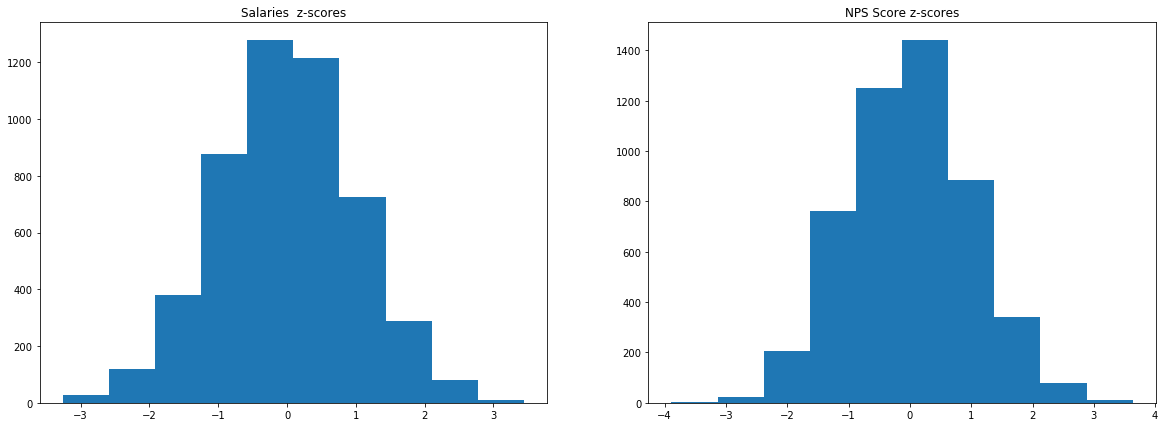

In [107]:
# plot for zscores for salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df['salaries_zscores'])
ax2.hist(df['NPS Score_zscores'])
ax1.set_title('Salaries  z-scores')
ax2.set_title('NPS Score z-scores')

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [112]:
outcome_list = [0, 1, 2, 3, 4, 5, 6, 7]
prob_list = []
for i in df['eventOutcome'].unique():
    prob_list.append(len(df['eventOutcome'].loc[df['eventOutcome'] == i]) / len(df))

prob_dict = dict(zip(outcome_list, prob_list))

<BarContainer object of 8 artists>

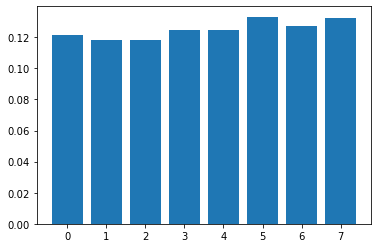

In [116]:
plt.bar(prob_dict.keys(), height=prob_dict.values())

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

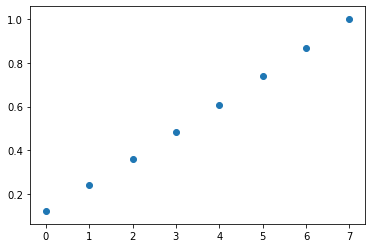

In [118]:
cdf_list = []
cdf = 0
for i in prob_dict.keys():
    cdf += prob_dict[i]
    cdf_list.append(cdf)

cdf_list

plt.scatter(x=prob_dict.keys(), y=cdf_list)

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [127]:
# find salaries with zscores <= 2.0 
import numpy as np

df['salaries_zscores'].loc[df['salaries_zscores'] <= -2.0]
df['salaries'].iloc[np.where(df['salaries_zscores'] <= -2.0)]

20      39383.0
41      38063.0
89      41458.0
107     40854.0
285     40886.0
         ...   
4692    38341.0
4707    41813.0
4731    41184.0
4765    40108.0
4949    38915.0
Name: salaries, Length: 123, dtype: float64

In [129]:
# calculate skewness and kurtosis of NPS Score column
import scipy.stats as ss

df['NPS Score'].skew(), df['NPS Score'].kurtosis()

(0.024512631283945336, -0.04096834144076489)

# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

Text(0.5, 1.0, 'PDF')

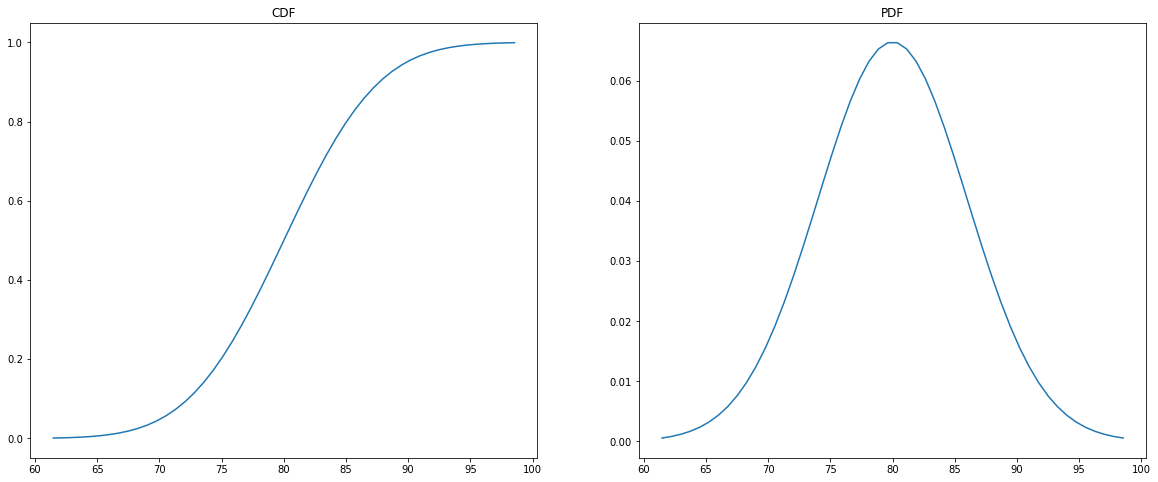

In [135]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots
x = np.linspace(ss.norm.ppf(0.001, 80, 6), ss.norm.ppf(.999, 80, 6))

y_cdf = ss.norm.cdf(x, 80, 6)
y_pdf = ss.norm.pdf(x, 80, 6)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.plot(x, y_cdf)
ax1.set_title('CDF')
ax2.plot(x, y_pdf)
ax2.set_title('PDF')

In [136]:
# what is the probability of drawing a student that sends at least 82 DMs a day?
ss.norm.cdf(82, 80, 6)

0.6305586598182363

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [137]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 
ss.norm.cdf(65, 80, 6) - ss.norm.cdf(65, 80, 9)

-0.04158068694703857

# run the cell below to convert your notebook to a README for assessment

In [ ]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md